In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
daily_Data = pd.read_excel('/home/ayush/Documents/machine_learning/sentiment_analysis1/training.xlsx',header=None)
daily_Data.columns = ["polarity", "text"]

In [3]:
daily_Data.head()

,polarity,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
daily_Data.isnull().sum()

polarity    0
text        0
dtype: int64

In [5]:
daily_Data.polarity.unique()

array([1, 0])

In [6]:
daily_Data.polarity.value_counts()

1    3995
0    3091
Name: polarity, dtype: int64

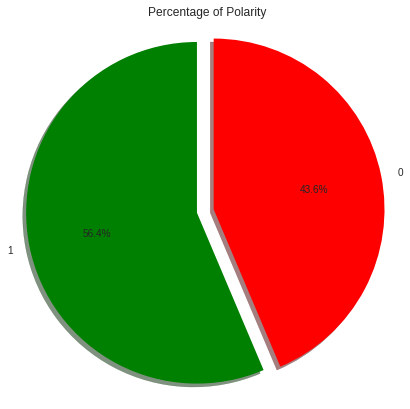

In [7]:
labels = '1', '0'
sizes = [3995, 3091]
colors = ['G', 'R']
explode = (0.1, 0.0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Polarity")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

In [8]:
# Word Cloud

In [9]:
polarity_0_words = ''
polarity_1_words = ''
polarity_1 = daily_Data[daily_Data.polarity == 1]
polarity_0  = daily_Data[daily_Data.polarity ==0]

In [10]:
import nltk
for val in polarity_1.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        polarity_1_words = polarity_1_words + words + ' '

In [11]:
for val in polarity_0.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        polarity_0_words = polarity_0_words + words + ' '

In [12]:
#polarity_1_words

"the da vinci code book is just awesome . this was the first clive cussler i 've ever read , but even books like relic , and da vinci code were more plausible than this . i liked the da vinci code a lot . i liked the da vinci code a lot . i liked the da vinci code but it ultimatly did n't seem to hold it 's own . that 's not even an exaggeration ) and at midnight we went to wal-mart to buy the da vinci code , which is amazing of course . i loved the da vinci code , but now i want something better and different ! .. i thought da vinci code was great , same with kite runner . the da vinci code is actually a good movie ... i thought the da vinci code was a pretty good book . the da vinci code is one of the most beautiful movies ive ever seen . the da vinci code is an * amazing * book , do not get me wrong . then i turn on the light and the radio and enjoy my da vinci code . the da vinci code was really good . i love da vinci code ... . i loved da vinci code.. to night : : the da vinci cod

In [13]:
from wordcloud import WordCloud
# Generate a word cloud image
polarity_0_wordcloud = WordCloud(width=600, height=400).generate(polarity_0_words)
polarity_1_wordcloud = WordCloud(width=600, height=400).generate(polarity_1_words)

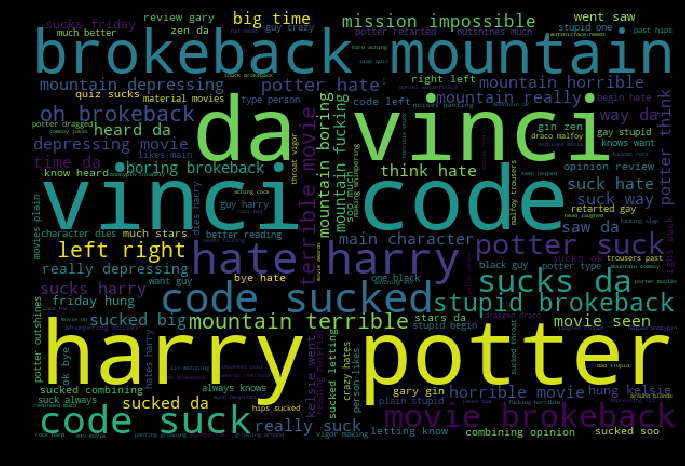

In [14]:
# polarity_0 Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(polarity_0_wordcloud)
plt.axis("off")
plt.tight_layout(pad=2)
plt.show()

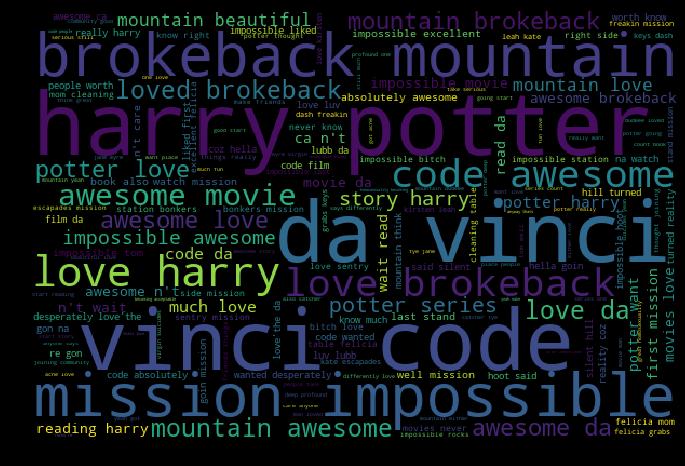

In [15]:
# polarity_1 word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(polarity_1_wordcloud)
plt.axis("off")
plt.tight_layout(pad=2)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(daily_Data['text'],daily_Data["polarity"], test_size = 0.3, random_state = 16)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english")

#fit_transform training data
X_train_count=vect.fit_transform(X_train)
X_train_array=X_train_count.toarray()

#transform test data
X_test_count= vect.transform(X_test)
X_test_array=X_test_count.toarray()

In [18]:
#Random_Forest for countvector

In [19]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( X_train_array, y_train )
# Use the random forest to make sentiment label predictions
result = forest.predict(X_test_array)

#accuracy
from sklearn.metrics import accuracy_score
acc_random_forest = accuracy_score(result,y_test)
print(acc_random_forest)
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

Training the random forest...
0.986359360301
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       931
          1       0.98      1.00      0.99      1195

avg / total       0.99      0.99      0.99      2126



In [20]:
#MultinomialNB for countvector

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_array, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predict=clf.predict(X_test_array)

#accuracy
from sklearn.metrics import accuracy_score
acc_multiNB=accuracy_score(predict,y_test)
print(acc_multiNB)
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

0.982596425212
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       931
          1       0.98      0.99      0.98      1195

avg / total       0.98      0.98      0.98      2126



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1,stop_words='english')
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
#idf = vectorizer.idf_
#print(dict(zip(vectorizer.get_feature_names(), idf)))
x_train_tfidf=pd.DataFrame(x_train.toarray().tolist())
x_test_tfidf=pd.DataFrame(x_test.toarray().tolist())

In [23]:
print(x_train_tfidf.head())

   0     1     2     3     4     5     6     7     8     9     ...   1469  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   1470  1471  1472  1473  1474  1475  1476  1477  1478  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1479 columns]


In [24]:
#Random_Forest for tfidf

In [25]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( x_train_tfidf, y_train )
# Use the random forest to make sentiment label predictions
result = forest.predict(x_test_tfidf)

#accuracy
from sklearn.metrics import accuracy_score
acc_random_forest = accuracy_score(result,y_test)
print(acc_random_forest)
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

Training the random forest...
0.987300094073
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       931
          1       0.98      0.99      0.99      1195

avg / total       0.99      0.99      0.99      2126



In [26]:
#MultinomialNB for tfidf

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_tfidf, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predict=clf.predict(x_test_tfidf)

#accuracy
from sklearn.metrics import accuracy_score
acc_multiNB=accuracy_score(predict,y_test)
print(acc_multiNB)
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

0.980714957667
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       931
          1       0.97      0.99      0.98      1195

avg / total       0.98      0.98      0.98      2126

